In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
import tensorflow as tf 
from tensorflow import keras
#from sklearn import cross_validation, ensemble, preprocessing, metrics
from sklearn.ensemble import RandomForestClassifier   ##分類
from sklearn.tree import DecisionTreeClassifier   ##分類
#from sklearn.ensemble import RandomForestRegressor    ##回歸
#from sklearn.metrics import roc_auc_score
import random
from sklearn.ensemble import AdaBoostClassifier   ##分類
#還是要固定訓練資料和測試資料筆數

from sklearn.model_selection import cross_val_score

In [3]:
dataset_num = 1

In [4]:
#all_no_miss
train_ori = pd.read_csv('0410RF_train_data_'+str(dataset_num)+'.csv')
test = pd.read_csv('0410RF_test_data_'+str(dataset_num)+'.csv')
combine = pd.concat([train_ori, test] , ignore_index=True)

In [5]:
combine = pd.get_dummies(data = combine , columns=["occupation","WHERE","PRE_DIAG"])

In [6]:
train_ori = combine[0:len(train_ori)]
test_ori = combine[len(train_ori):]

In [7]:
train_feature_ori = train_ori.columns[1:]
train_target_ori = train_ori.columns[0]
train_feature_ori = train_ori[train_feature_ori]
train_y_ori = train_ori[train_target_ori]

In [8]:
test_feature_ori = test_ori.columns[1:]
test_target_ori = test_ori.columns[0]
test_feature_ori = test_ori[test_feature_ori]
test_y_ori = test_ori[test_target_ori]

In [9]:
column = pd.read_csv('0410train_data_column.csv')

第1次
25 trees
C-stat: 0.5

50 trees
C-stat: 0.5714285714285714

100 trees
C-stat: 0.5

500 trees
C-stat: 0.5

1000 trees
C-stat: 0.5

---------------------------
第2次
25 trees
C-stat: 0.5714285714285714

50 trees
C-stat: 0.5

100 trees
C-stat: 0.5

500 trees
C-stat: 0.5

1000 trees
C-stat: 0.5

---------------------------
第3次
25 trees
C-stat: 0.5714285714285714

50 trees
C-stat: 0.5714285714285714

100 trees
C-stat: 0.5

500 trees
C-stat: 0.5

1000 trees
C-stat: 0.5

---------------------------
第4次
25 trees
C-stat: 0.6428571428571429

50 trees
C-stat: 0.5714285714285714

100 trees
C-stat: 0.5

500 trees
C-stat: 0.5

1000 trees
C-stat: 0.5

---------------------------
第5次
25 trees
C-stat: 0.5714285714285714

50 trees
C-stat: 0.5714285714285714

100 trees
C-stat: 0.5

500 trees
C-stat: 0.5

1000 trees
C-stat: 0.5

---------------------------
第6次
25 trees
C-stat: 0.5

50 trees
C-stat: 0.5

100 trees
C-stat: 0.6428571428571429

500 trees
C-stat: 0.5

1000 trees
C-stat: 0.5

-----------------

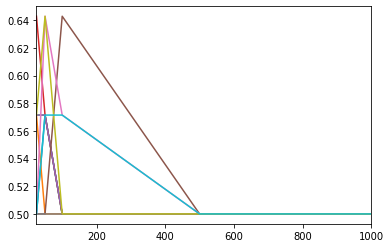

In [10]:
for i in range(10):
    result = []
    n_estimator_options = [ 25, 50, 100, 500, 1000 ]
    print("第"+str(i+1)+"次")
    for trees in n_estimator_options:
        model = RandomForestClassifier(trees, oob_score = True, n_jobs = -1 )
        model.fit( train_feature_ori , train_y_ori )
        print( trees, "trees" )
        acc = model.score(test_feature_ori, test_y_ori)
        print( "C-stat:", acc )
        result.append(acc)
        print("")
    pd.Series(result, n_estimator_options).plot()
    print("---------------------------")

25 trees
C-stat: 0.5

26 trees
C-stat: 0.6428571428571429

126 trees
C-stat: 0.5

226 trees
C-stat: 0.5

326 trees
C-stat: 0.5

426 trees
C-stat: 0.5

526 trees
C-stat: 0.5

626 trees
C-stat: 0.5

726 trees
C-stat: 0.5

826 trees
C-stat: 0.5

926 trees
C-stat: 0.5

---------------------------


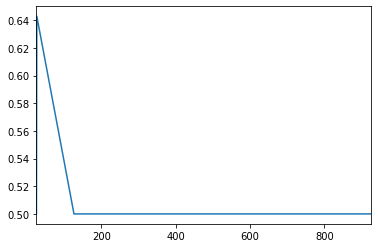

In [75]:
#result = []
#n_estimator_options = [ 25 ]
#for i in range(26,1000,100):
#    n_estimator_options.append(i)     
#for trees in n_estimator_options:
#    model = RandomForestClassifier(trees, oob_score = True, n_jobs = -1 )
#    model.fit( train_feature_ori , train_y_ori )
#    print( trees, "trees" )
#    acc = model.score(test_feature_ori, test_y_ori)
#    print( "C-stat:", acc )
#    result.append(acc)
#    print("")
#pd.Series(result, n_estimator_options).plot()
#print("---------------------------")